In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

BASE_DIR = Path("..")
PROCESSED_DIR = BASE_DIR / "processed"

# Cargar dataset con coherencia predictiva (salida del libro 04)
data_path = PROCESSED_DIR / "suelos_coherencia.csv"
print("Cargando datos desde:", data_path.resolve())

df = pd.read_csv(data_path)
print("Dataset cargado:", df.shape)
df.head()

Cargando datos desde: D:\ICD-SOIL\processed\suelos_coherencia.csv


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\2510588381.py:16: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Dataset cargado: (35111, 64)


,secuencial,fecha_de_an_lisis,departamento,municipio,cultivo,estado,tiempo_de_establecimiento,topografia,drenaje,riego,...,icd_predictivo_cic,icd_predictivo_conductividad_electrica,icd_predictivo_hierro_olsen,icd_predictivo_cobre_disponible,icd_predictivo_manganeso_olsen,icd_predictivo_zinc_olsen,icd_predictivo_boro_disponible,icd_predictivo_hierro_doble_acido,icd_predictivo_cobre_disponible_doble_acido,icd_predictivo_manganeso_doble_acido
0,1,2014-07-01,NARIÑO,SAN ANDRÉS DE TUMACO,No Indica,No indica,No indica,No indica,No indica,No indica,...,0.999362,0.997284,0.973957,0.976045,0.968454,0.992085,0.994496,NaN,NaN,NaN
1,164,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Plano,Buen drenaje,Aspersión,...,0.999646,0.990211,0.959093,0.995510,0.993194,0.993203,0.968149,NaN,NaN,NaN
2,165,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Ondulado,Buen drenaje,Aspersión,...,0.997487,0.998110,0.932267,0.976613,0.996106,0.986965,0.920922,NaN,NaN,NaN
3,166,2014-05-09,CUNDINAMARCA,FUNZA,Guisantes,Por establecer,No indica,Plano,Buen drenaje,Goteo,...,0.999330,0.991536,0.985320,0.996792,0.959294,0.905247,0.977866,NaN,NaN,NaN
4,167,2014-05-09,VALLE DEL CAUCA,LA UNIÓN,Guanábana,Establecido,Mas de 10 años,Plano,Buen drenaje,Manguera,...,0.990954,0.762042,0.999361,0.995917,0.991784,0.992885,0.000000,NaN,NaN,NaN


In [27]:
# Detectar todas las columnas que representan ICD predictivo
icd_cols = [c for c in df.columns if c.startswith("icd_predictivo_")]

print(f"Columnas ICD predictivo encontradas ({len(icd_cols)}):")
icd_cols[:10]

Columnas ICD predictivo encontradas (20):


['icd_predictivo_ph_agua_suelo',
 'icd_predictivo_materia_organica',
 'icd_predictivo_fosforo_bray_ii',
 'icd_predictivo_azufre_fosfato_monocalcico',
 'icd_predictivo_acidez_intercambiable',
 'icd_predictivo_aluminio_intercambiable',
 'icd_predictivo_calcio_intercambiable',
 'icd_predictivo_magnesio_intercambiable',
 'icd_predictivo_potasio_intercambiable',
 'icd_predictivo_sodio_intercambiable']

In [28]:
# Resumen estadístico de ICD predictivo por variable de suelo
resumen_icd = []

for col in icd_cols:
    serie = df[col]
    resumen_icd.append({
        "variable": col.replace("icd_predictivo_", ""),
        "count": int(serie.notna().sum()),
        "mean_icd": float(serie.mean(skipna=True)),
        "std_icd": float(serie.std(skipna=True)),
        "min_icd": float(serie.min(skipna=True)),
        "p25_icd": float(serie.quantile(0.25)),
        "p50_icd": float(serie.quantile(0.50)),
        "p75_icd": float(serie.quantile(0.75)),
        "max_icd": float(serie.max(skipna=True)),
    })

df_resumen_icd = pd.DataFrame(resumen_icd).sort_values("mean_icd", ascending=False)
df_resumen_icd

,variable,count,mean_icd,std_icd,min_icd,p25_icd,p50_icd,p75_icd,max_icd
10,cic,35087,0.994900,0.018761,0.000000,0.995738,0.998063,0.999201,1.000000
6,calcio_intercambiable,32902,0.994622,0.019232,0.000000,0.995112,0.997805,0.999067,1.000000
4,acidez_intercambiable,17764,0.988006,0.021334,0.220609,0.986722,0.993635,0.997210,1.000000
5,aluminio_intercambiable,17764,0.987432,0.022922,0.289462,0.986242,0.993584,0.997365,1.000000
7,magnesio_intercambiable,33356,0.984035,0.041110,0.000000,0.985526,0.993732,0.997545,1.000000
3,azufre_fosfato_monocalcico,34438,0.980738,0.059825,0.000000,0.984335,0.993009,0.997041,1.000000
11,conductividad_electrica,34753,0.976562,0.064892,0.000000,0.979504,0.991043,0.996414,1.000000
9,sodio_intercambiable,17687,0.976088,0.070613,0.000000,0.981670,0.992002,0.996692,0.999999
0,ph_agua_suelo,35103,0.966760,0.043516,0.227392,0.959123,0.980374,0.991552,1.000000
15,zinc_olsen,20462,0.964236,0.081811,0.000000,0.966663,0.985141,0.993253,0.999999


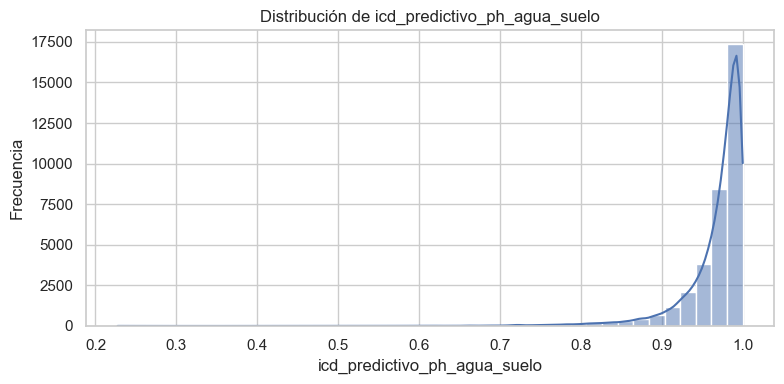

In [29]:
# Elegimos una variable para inspeccionar su distribución de ICD predictivo
col_plot = "icd_predictivo_ph_agua_suelo"  # puedes cambiarla por otra de icd_cols

if col_plot in icd_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col_plot].dropna(), bins=40, kde=True)
    plt.title(f"Distribución de {col_plot}")
    plt.xlabel(col_plot)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
else:
    print(f"La columna {col_plot} no está en el dataframe.")

In [30]:
# Determinar columna de agrupación territorial
group_col = None
if "dep_norm" in df.columns:
    group_col = "dep_norm"
elif "departamento" in df.columns:
    group_col = "departamento"

if group_col is None:
    raise ValueError("No se encontró ni 'dep_norm' ni 'departamento' en el dataframe.")

print("Agrupando coherencia por columna territorial:", group_col)

Agrupando coherencia por columna territorial: departamento


In [31]:

# Promedio de ICD predictivo por departamento (promedio de todas las variables)
df_coh_depto = (
    df.groupby(group_col)[icd_cols]
      .mean()
      .reset_index()
)

df_coh_depto.head()

,departamento,icd_predictivo_ph_agua_suelo,icd_predictivo_materia_organica,icd_predictivo_fosforo_bray_ii,icd_predictivo_azufre_fosfato_monocalcico,icd_predictivo_acidez_intercambiable,icd_predictivo_aluminio_intercambiable,icd_predictivo_calcio_intercambiable,icd_predictivo_magnesio_intercambiable,icd_predictivo_potasio_intercambiable,...,icd_predictivo_cic,icd_predictivo_conductividad_electrica,icd_predictivo_hierro_olsen,icd_predictivo_cobre_disponible,icd_predictivo_manganeso_olsen,icd_predictivo_zinc_olsen,icd_predictivo_boro_disponible,icd_predictivo_hierro_doble_acido,icd_predictivo_cobre_disponible_doble_acido,icd_predictivo_manganeso_doble_acido
0,AMAZONAS,0.969027,0.948191,0.977650,0.977631,0.923628,0.925465,0.993153,0.990754,0.977154,...,0.993652,0.991864,0.919343,0.950550,0.775965,0.955951,0.952734,NaN,NaN,NaN
1,ANTIOQUIA,0.971245,0.912071,0.953159,0.979712,0.987627,0.986897,0.994724,0.986610,0.959845,...,0.995277,0.977305,0.920761,0.942798,0.943264,0.957394,0.946813,NaN,NaN,NaN
2,ARAUCA,0.975319,0.948468,0.962080,0.991301,0.992444,0.992695,0.997437,0.991678,0.977919,...,0.997582,0.991115,0.973909,0.961898,0.939174,0.982070,0.967558,0.923408,0.908503,0.886918
3,ATLÁNTICO,0.947480,0.956858,0.943189,0.934711,0.996200,0.996934,0.986224,0.960336,0.948736,...,0.989221,0.934949,0.980090,0.960334,0.947267,0.980605,0.937276,NaN,NaN,NaN
4,"BOGOTÁ, D.C.",0.960952,0.897368,0.952182,0.979944,0.984225,0.982600,0.992640,0.977843,0.940991,...,0.994282,0.975921,0.922654,0.941785,0.936633,0.963157,0.956344,NaN,NaN,NaN


In [32]:
# Crear un ICD predictivo promedio global por departamento
df_coh_depto["icd_predictivo_promedio"] = df_coh_depto[icd_cols].mean(axis=1, skipna=True)

ranking_deptos = (
    df_coh_depto[[group_col, "icd_predictivo_promedio"]]
    .sort_values("icd_predictivo_promedio", ascending=False)
)

ranking_deptos.head(10)

,departamento,icd_predictivo_promedio
31,VICHADA,0.979993
15,GUAINÍA,0.979223
8,CAQUETÁ,0.978292
30,VAUPÉS,0.976791
16,GUAVIARE,0.973993
21,NARIÑO,0.972838
5,BOLÍVAR,0.972676
10,CAUCA,0.972441
23,PUTUMAYO,0.972359
20,META,0.972125


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\2575388011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


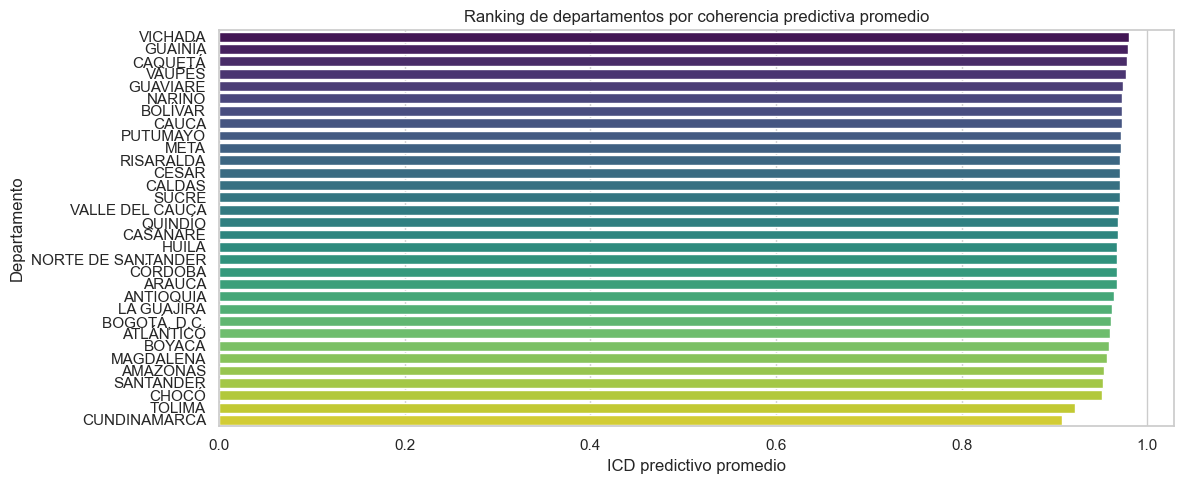

In [33]:

# Gráfico: ranking de departamentos por coherencia predictiva promedio
plt.figure(figsize=(12, 5))
sns.barplot(
    data=ranking_deptos,
    x="icd_predictivo_promedio",
    y=group_col,
    palette="viridis"
)
plt.xticks(rotation=0)
plt.xlabel("ICD predictivo promedio")
plt.ylabel("Departamento")
plt.title("Ranking de departamentos por coherencia predictiva promedio")
plt.tight_layout()
plt.show()

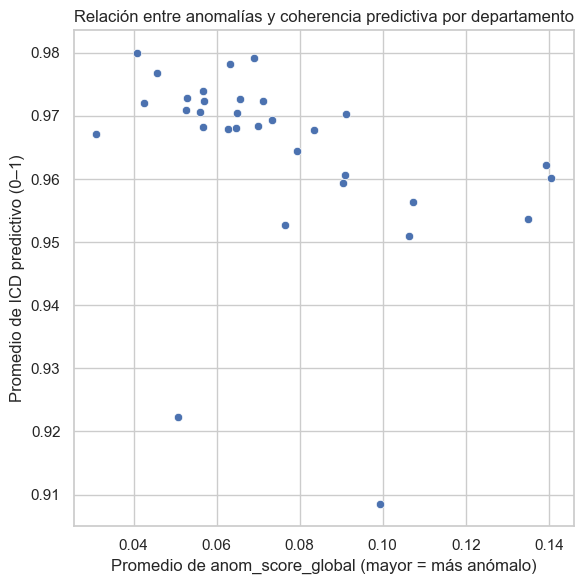

In [34]:
if "anom_score_global" in df.columns:

    # 1) Promedio de anomalías por departamento
    anom_por_depto = (
        df.groupby(group_col)["anom_score_global"]
          .mean()
          .reset_index(name="anom_mean")
    )

    # 2) Tomar coherencia promedio por departamento
    coh_por_depto = df_coh_depto[[group_col, "icd_predictivo_promedio"]].copy()
    coh_por_depto = coh_por_depto.rename(
        columns={"icd_predictivo_promedio": "icd_pred_mean"}
    )

    # 3) Unir ambos
    df_anom_coh = anom_por_depto.merge(coh_por_depto, on=group_col, how="inner")

    # 4) Graficar relación entre anomalía y coherencia
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data=df_anom_coh,
        x="anom_mean",
        y="icd_pred_mean"
    )
    plt.xlabel("Promedio de anom_score_global (mayor = más anómalo)")
    plt.ylabel("Promedio de ICD predictivo (0–1)")
    plt.title("Relación entre anomalías y coherencia predictiva por departamento")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    df_anom_coh.sort_values("anom_mean", ascending=False).head()

else:
    print("No se encontró 'anom_score_global' en el dataframe. Asegúrate de haber corrido el libro 03.")

In [35]:
# Pasar de formato ancho (muchas columnas ICD) a largo:
# columnas: [departamento/dep_norm, icd_var, icd_value, variable]

df_long_icd = df_coh_depto.melt(
    id_vars=[group_col],
    value_vars=icd_cols,
    var_name="icd_var",
    value_name="icd_value"
)

# Quitar prefijo 'icd_predictivo_' del nombre
df_long_icd["variable"] = df_long_icd["icd_var"].str.replace("icd_predictivo_", "", regex=False)

df_long_icd.head()

,departamento,icd_var,icd_value,variable
0,AMAZONAS,icd_predictivo_ph_agua_suelo,0.969027,ph_agua_suelo
1,ANTIOQUIA,icd_predictivo_ph_agua_suelo,0.971245,ph_agua_suelo
2,ARAUCA,icd_predictivo_ph_agua_suelo,0.975319,ph_agua_suelo
3,ATLÁNTICO,icd_predictivo_ph_agua_suelo,0.947480,ph_agua_suelo
4,"BOGOTÁ, D.C.",icd_predictivo_ph_agua_suelo,0.960952,ph_agua_suelo


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\3554427918.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


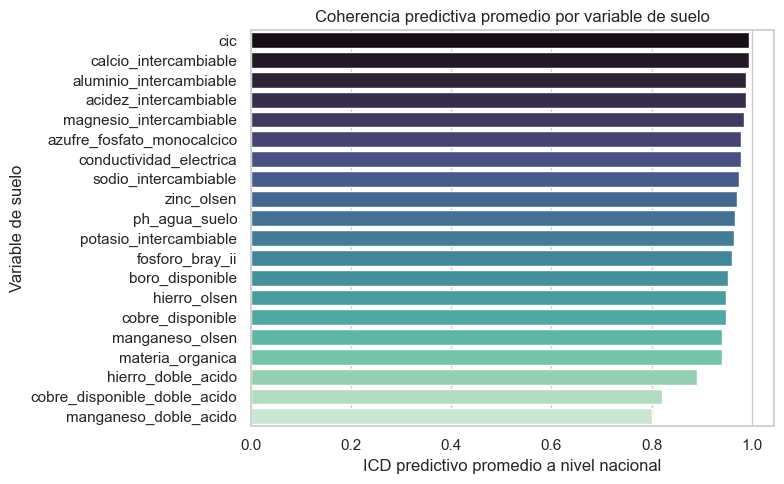

,variable,icd_value
0,cic,0.994285
1,calcio_intercambiable,0.994150
2,aluminio_intercambiable,0.987620
3,acidez_intercambiable,0.987606
4,magnesio_intercambiable,0.983961


In [36]:
coh_por_var = (
    df_long_icd
    .groupby("variable")["icd_value"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=coh_por_var,
    x="icd_value",
    y="variable",
    palette="mako"
)
plt.xlabel("ICD predictivo promedio a nivel nacional")
plt.ylabel("Variable de suelo")
plt.title("Coherencia predictiva promedio por variable de suelo")
plt.tight_layout()
plt.show()

coh_por_var.head()

In [37]:

# Guardar resumen en formato largo: departamento–variable–icd_predictivo

icd_depto_var_path = PROCESSED_DIR / "icd_predictivo_depto_variable.csv"
df_long_icd.to_csv(icd_depto_var_path, index=False, encoding="utf-8")

print("💾 Guardado resumen icd_predictivo por departamento y variable en:")
print("   ", icd_depto_var_path.resolve())

💾 Guardado resumen icd_predictivo por departamento y variable en:
    D:\ICD-SOIL\processed\icd_predictivo_depto_variable.csv
